In [132]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
import requests
import json

## Retrieving income and population data
data acquired from bme.ibge.gov.br related to income.

In [234]:
def load_income_91_00(year=1991):
    df = pd.read_csv(
        f'../data/economy/income/income all sources {year} census bme.csv'
        , sep=';'
        , encoding='ANSI'
        , decimal=','
        , thousands='.'
    )

    df.drop(
        labels= [
            'Código do Nível Geográfico'
            , 'Nível Geográfico'
            , 'Item Geográfico'
            , 'Código do Item Temporal'
            , 'Nível Temporal'
            , 'Ordem Geográfica'
            , 'Freqüência'
            , 'Observações']
        , axis=1
        , inplace=True
    )
    
    df.columns = ['Cod', 'Year', 'GrossIncome']
    
    return df

In [235]:
df_income_1991 = load_income_91_00(year=1991)

df_income_2000 = load_income_91_00(year=2000)

df_income_2010 = load_income_91_00(year=2010)

In [237]:
df_income_2000.GrossIncome.sum()

50502003153

In [233]:
# correção dos valores de julho de 2000 e julho de 2010 para 31 de dezembro de 2018
df_income_2000['GrossIncomeDeflated'] = (df_income_2000.GrossIncome * 3.15907400).astype(np.int64)
df_income_2010['GrossIncomeDeflated'] = (df_income_2010.GrossIncome * 1.63968750).astype(np.int64)

In [136]:
df_pop = pd.read_csv('../data/pop/Tabela 200sidra  - pop 1970 a 2010.csv', sep=';', na_values='...')

In [137]:
# carregando dados populacionais
df_pop.rename(columns={'Cód.':'Cod'}, inplace=True)

In [138]:
df_income_2000 = df_income_2000.merge(
    right=df_pop[['Cod', '2000']].dropna().astype(np.int64)
    , on='Cod'
    , how='left'
)

In [139]:
df_income_2010 = df_income_2010.merge(
    right=df_pop[['Cod', '2010']].dropna().astype(np.int64)
    , on='Cod'
    , how='left'
)

In [140]:
df_income_2000.rename(columns={'2000':'pop'}, inplace=True)
df_income_2010.rename(columns={'2010':'pop'}, inplace=True)

In [141]:
pd.concat(objs=[df_income_2000, df_income_2010], axis=0)

,Cod,Year,GrossIncome,GrossIncomeDeflated,pop
0,5200050,2000,975424,3081436,4971
1,3100104,2000,1194737,3774262,6446
2,5200100,2000,1923252,6075695,11452
3,3100203,2000,5675485,17929277,22360
4,1500107,2000,12187142,38500083,119152
...,...,...,...,...,...
5560,5222005,2010,8109763,13297477,12548
5561,5222054,2010,4514614,7402556,7371
5562,5222203,2010,1751646,2872152,4735
5563,5222302,2010,1848164,3030411,5145


In [142]:
df_territory = pd.read_csv('../data/territory/list_arranjos_pop.csv', sep=';')

In [143]:
df_territory = df_territory[~df_territory['Territory'].str.startswith('Demais')]

In [144]:
df_territory.rename(columns={'Territory':'Metropolitan Area'}, inplace=True)

In [145]:
df_income_2000_2010 = pd.concat(objs=[df_income_2000, df_income_2010], axis=0)

In [146]:
df_income_2000_2010 = df_income_2000_2010.merge(right=df_territory, on='Cod')

In [147]:
df_income_2000_2010 = df_income_2000_2010.groupby(by=['Metropolitan Area', 'Year'], as_index=False).sum()

In [148]:
df_income_2000_2010['Income Per Capita'] = (df_income_2000_2010['GrossIncomeDeflated'] / df_income_2000_2010['pop']).astype(np.int64)

In [149]:
df_income_2000_2010[df_income_2000_2010['Year'] == 2010]

,Metropolitan Area,Year,Cod,GrossIncome,GrossIncomeDeflated,pop,Income Per Capita
1,Belo Horizonte,2010,72201369,5029468006,8246755809,4744706,1738
3,Belém,2010,6008125,1446200381,2371316686,2025276,1170
5,Brasília,2010,47008418,4669901655,7657179367,3360552,2278
7,Campinas,2010,28274994,2165419011,3550610480,1874442,1894
9,Curitiba,2010,73979386,3606614703,5913721037,3054076,1936
11,Florianópolis,2010,42089297,1185795747,1944334459,883808,2199
13,Fortaleza,2010,18444706,2296752742,3765956757,3327021,1131
15,Goiânia,2010,78142510,2174111920,3564864130,2078399,1715
17,Manaus,2010,1302603,1327660607,2176948501,1802014,1208
19,Porto Alegre,2010,125027465,4254620420,6976247905,3701482,1884


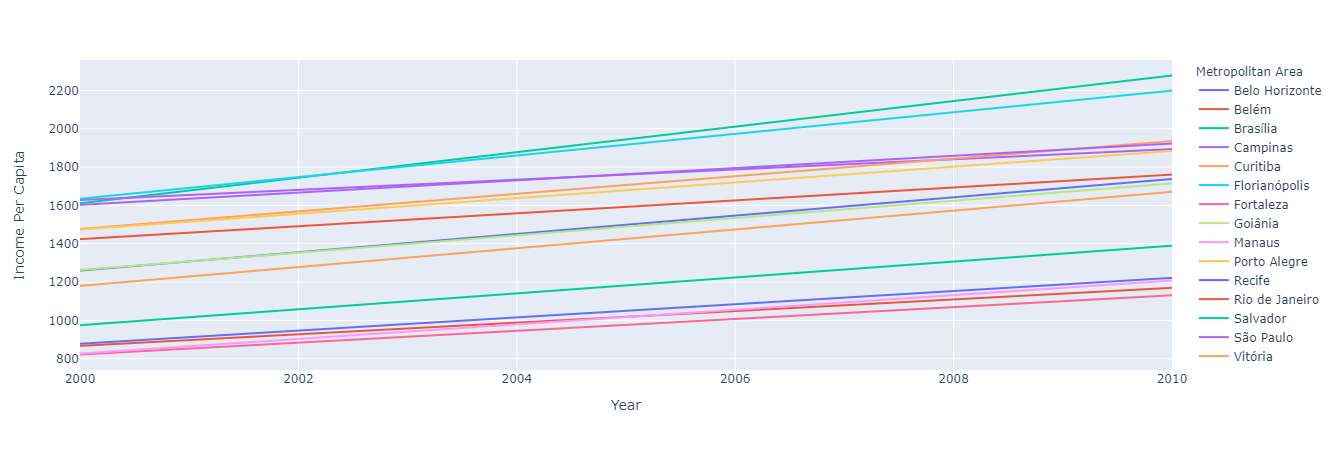

In [150]:
fig = px.line(
    data_frame=df_income_2000_2010
    , x='Year'
    , y='Income Per Capita'
    , color='Metropolitan Area'

)
fig.show()

In [151]:
dict_groups = {
    'Belo Horizonte':'Group B'
    ,'Belém':'Group C'
    ,'Brasília': 'Group A'
    ,'Campinas': 'Group B'
    ,'Curitiba': 'Group B'
    ,'Florianópolis': 'Group A'
    ,'Fortaleza':'Group C'
    ,'Goiânia':'Group B'
    ,'Manaus': 'Group C'
    ,'Porto Alegre': 'Group B'
    ,'Recife':'Group C'
    ,'Rio de Janeiro':'Group B'
    ,'Salvador':'Group C'
    ,'São Paulo': 'Group B'
    ,'Vitória':'Group B'
}

In [152]:
for i, scatter in enumerate(fig.data):
    key = fig.data[i].legendgroup
    fig.data[i].legendgroup = dict_groups[key]

In [153]:
dict_dash = {
    'Belo Horizonte':'dot'
    ,'Belém':'longdashdot'
    ,'Brasília': 'solid'
    ,'Campinas': 'dot'
    ,'Curitiba': 'dot'
    ,'Florianópolis': 'solid'
    ,'Fortaleza':'longdashdot'
    ,'Goiânia':'dot'
    ,'Manaus': 'longdashdot'
    ,'Porto Alegre': 'dot'
    ,'Recife':'longdashdot'
    ,'Rio de Janeiro':'dot'
    ,'Salvador':'longdashdot'
    ,'São Paulo': 'dot'
    ,'Vitória':'dot'
}

In [154]:
fig.data[0].line.dash

'solid'

In [155]:
for i, key in enumerate(dict_dash.keys()):
    fig.data[i].line.dash = dict_dash[key]

In [156]:
fig.layout.legend.tracegroupgap = 15

In [157]:
fig.layout.legend.traceorder = "reversed+grouped"

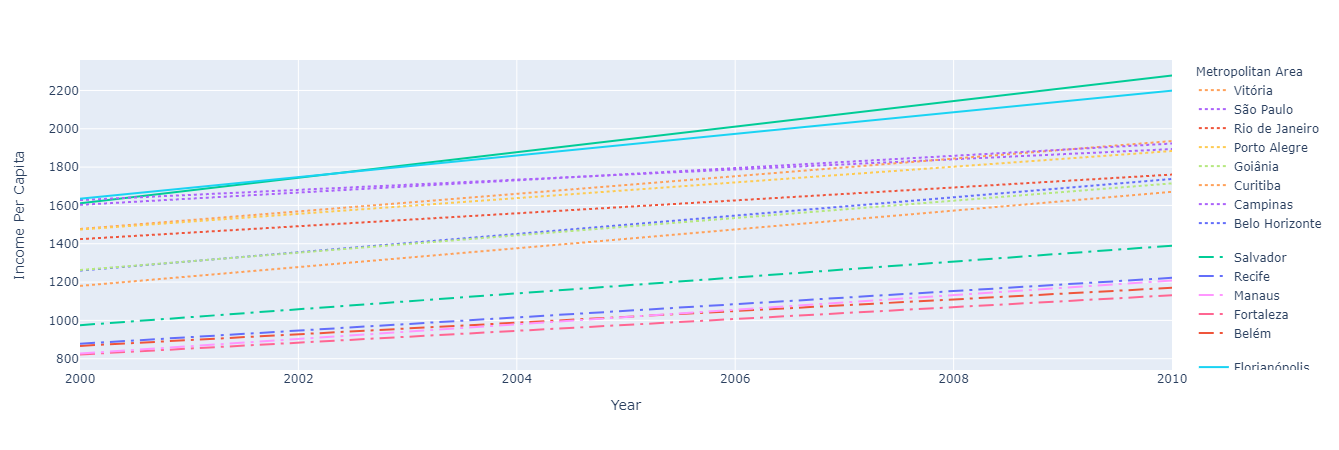

In [158]:
fig

## GDP

In [159]:
df_gdp = pd.read_csv('../data/economy/gdp/gdp_2002_2018_base18.csv', sep=';')

In [160]:
df_gdp = df_territory.merge(df_gdp, how='left', on='Cod')

In [161]:
df_gdp.drop(labels=['Cod', 'Municipio'], axis=1, inplace=True)

In [162]:
df_gdp.iloc[:,1:] = df_gdp.iloc[:,1:].astype(np.int64)

In [163]:
df_gdp = df_gdp.melt(df_gdp.columns[0], var_name='Year', value_name='GDP R$1000')

In [164]:
df_gdp = df_gdp.groupby(by=['Metropolitan Area', 'Year'], as_index=False).sum()

In [165]:
df_gdp

,Metropolitan Area,Year,GDP R$1000
0,Belo Horizonte,2002,137470936
1,Belo Horizonte,2003,139053813
2,Belo Horizonte,2004,146912914
3,Belo Horizonte,2005,153592794
4,Belo Horizonte,2006,166315348
...,...,...,...
250,Vitória,2014,78801206
251,Vitória,2015,72966685
252,Vitória,2016,66029724
253,Vitória,2017,63086570


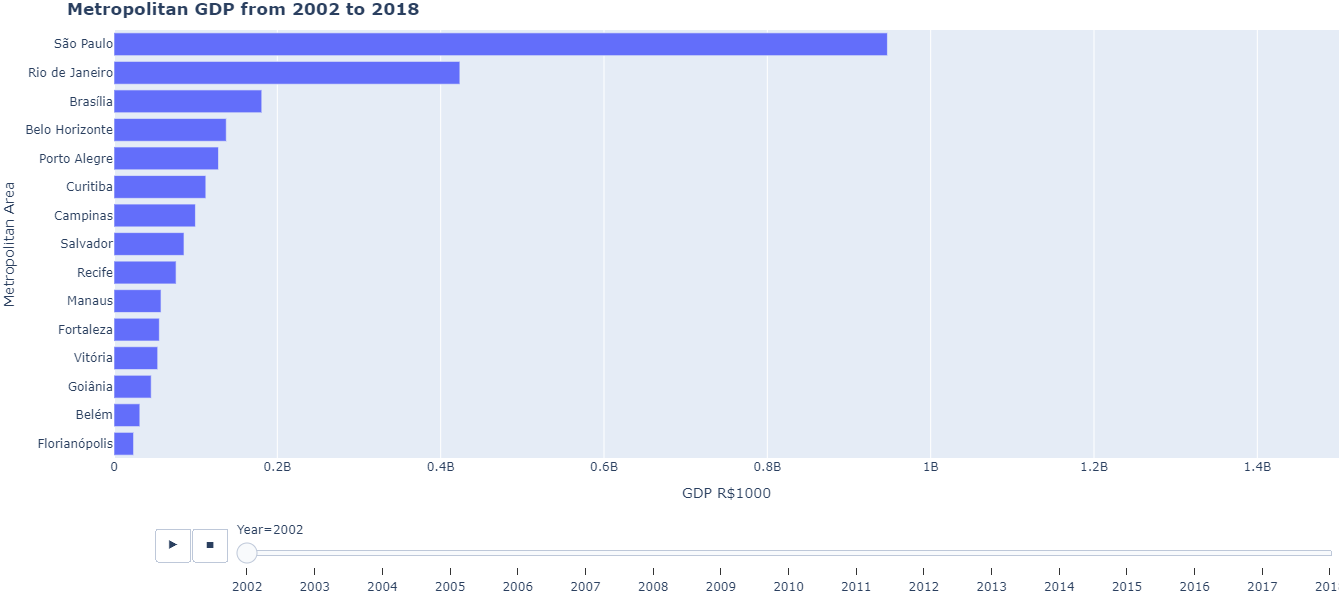

In [166]:
fig = px.bar(
    data_frame=df_gdp
    , y = 'Metropolitan Area'
    , x='GDP R$1000'
    , orientation='h'
    , animation_frame='Year'
    , range_x = [0,1.5e9]
    , title = '<b>Metropolitan GDP from 2002 to 2018<b>'
    , height=600 
    , width = 1380
)

fig.update_layout(yaxis={'categoryorder':"sum ascending"})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000 
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))

In [167]:
pio.write_json(fig, '../data/economy/gdp/px_bar_gdp_02_18_dynamic.json')

## GDP 1970 A 1996

In [168]:
df_gdp_1970_1996 = pd.read_csv('../data/economy/gdp/gdp_1970_1996_base10.csv', sep=';')

In [169]:
df_gdp_1970_1996.iloc[:,3:].sum()

1975   1,203,270,237.50
1980   1,743,651,216.19
1985   1,958,296,742.61
1996   2,130,635,355.19
dtype: float64

In [170]:
df_gdp_1970_1996.rename(columns={'Código':'Cod'}, inplace=True)

In [171]:
df_gdp_1970_1996.fillna(0, inplace=True)

In [172]:
df_gdp_1970_1996['1996'].max()

316172787.1

In [173]:
df_gdp_1970_1996

,Cod,Município,1970,1975,1980,1985,1996
0,1200013,Acrelândia,0.00,0.00,0.00,0.00,"26,087.87"
1,1200054,Assis Brasil,0.00,0.00,"5,137.53","7,837.33","16,125.94"
2,1200104,Brasiléia,"29,836.81","51,756.40","58,906.27","130,550.84","113,246.63"
3,1200138,Bujari,0.00,0.00,0.00,0.00,"43,815.46"
4,1200179,Capixaba,0.00,0.00,0.00,0.00,"30,908.23"
...,...,...,...,...,...,...,...
5591,1721208,Tocantinópolis,"34,686.17","44,908.96","90,854.45","69,650.59","47,245.24"
5592,1721257,Tupirama,0.00,0.00,0.00,0.00,0.00
5593,1721307,Tupiratins,0.00,0.00,0.00,0.00,"3,590.03"
5594,1722081,Wanderlândia,0.00,0.00,0.00,"8,966.59","37,097.17"


In [174]:
df_gdp_1970_1996.iloc[:,3:].sum()

1975   1,203,270,237.50
1980   1,743,651,216.19
1985   1,958,296,742.61
1996   2,130,635,355.19
dtype: float64

In [175]:
# deflating according to implicit deflator of gdp IPEA
df_gdp_1970_1996.iloc[:,3:] = df_gdp_1970_1996.iloc[:,3:] * 1.70763883589303

In [176]:
df_gdp_1970_1996['1996'].max()

539908930.1044989

In [177]:
df_gdp_1970_1996 = df_gdp_1970_1996.merge(df_territory, on='Cod', how='inner')

In [178]:
df_gdp_1970_1996['1996'].max()

539908930.1044989

In [179]:
df_gdp_1970_1996.drop(labels=['Cod', 'Município'], axis=1, inplace=True)

In [180]:
df_gdp_1970_1996[df_gdp_1970_1996['1996'] == df_gdp_1970_1996['1996'].max()]

,1970,1975,1980,1985,1996,Metropolitan Area
207,"137,425,142.60","378,693,659.99","465,030,036.64","436,622,618.99","539,908,930.10",São Paulo


In [181]:
df_gdp_1970_1996 = df_gdp_1970_1996.melt(id_vars=['Metropolitan Area'], var_name='Year', value_name='GDP R$1000')

In [182]:
df_gdp_1970_1996[df_gdp_1970_1996['GDP R$1000'] == df_gdp_1970_1996['GDP R$1000'].max()]

,Metropolitan Area,Year,GDP R$1000
1063,São Paulo,1996,"539,908,930.10"


In [183]:
df_gdp_1970_1996 = df_gdp_1970_1996.groupby(by=['Metropolitan Area', 'Year'], as_index=False).sum()

In [184]:
df_gdp_1970_1996

,Metropolitan Area,Year,GDP R$1000
0,Belo Horizonte,1970,"18,602,938.05"
1,Belo Horizonte,1975,"61,494,173.25"
2,Belo Horizonte,1980,"97,733,787.99"
3,Belo Horizonte,1985,"102,179,753.04"
4,Belo Horizonte,1996,"140,655,239.04"
...,...,...,...
70,Vitória,1970,"4,449,609.65"
71,Vitória,1975,"10,505,897.17"
72,Vitória,1980,"23,943,120.13"
73,Vitória,1985,"29,274,617.73"


In [185]:
df_gdp_70_18 = pd.concat(objs=[df_gdp, df_gdp_1970_1996], axis=0)

In [186]:
df_gdp_70_18[df_gdp_70_18['Metropolitan Area'] == 'São Paulo']

,Metropolitan Area,Year,GDP R$1000
221,São Paulo,2002,"947,059,117.00"
222,São Paulo,2003,"934,669,160.00"
223,São Paulo,2004,"950,586,630.00"
224,São Paulo,2005,"1,021,156,398.00"
225,São Paulo,2006,"1,063,267,421.00"
226,São Paulo,2007,"1,135,267,200.00"
227,São Paulo,2008,"1,162,417,293.00"
228,São Paulo,2009,"1,172,089,453.00"
229,São Paulo,2010,"1,249,136,397.00"
230,São Paulo,2011,"1,282,829,400.00"


In [187]:
df_gdp_70_18.loc[:,'Year'] = df_gdp_70_18.loc[:,'Year'].astype(np.int32)

In [188]:
df_gdp_70_18.sort_values(by=['Year', 'Metropolitan Area'], inplace=True)

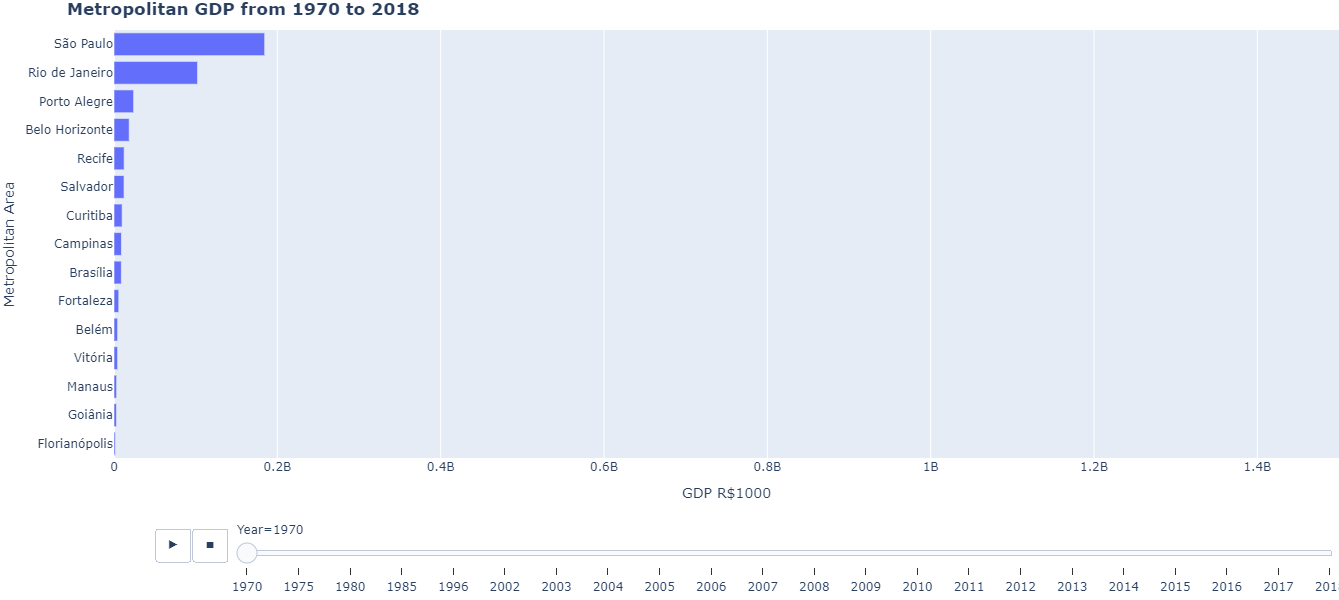

In [189]:
fig_70_18 = px.bar(
    data_frame=df_gdp_70_18
    , y = 'Metropolitan Area'
    , x='GDP R$1000'
    , orientation='h'
    , animation_frame='Year'
    , range_x = [0,1.5e9]
    , title = '<b>Metropolitan GDP from 1970 to 2018<b>'
    , height=600 
    , width = 1380
)

fig_70_18.update_layout(yaxis={'categoryorder':"sum ascending"})
fig_70_18.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000 
fig_70_18.update_layout(margin=dict(l=0, r=0, b=0, t=30))

In [190]:
pio.write_json(fig_70_18, '../data/economy/gdp/px_bar_gdp_02_18_dynamic.json')

## Retrieving Population Data

In [191]:
df_pop = pd.read_csv('../data/pop/Tabela 200sidra  - pop 1970 a 2010.csv', sep=';', na_values='...')

In [192]:
df_pop.columns = ['Cod', 'Municipality', '1970', '1980', '1991', '2000', '2010', '2018']

In [193]:
#df_pop.drop(labels=['Municipio'], axis=1, inplace=True)

In [194]:
df_pop = df_pop.melt(id_vars=['Cod', 'Municipality'], var_name='Year', value_name='Pop')

In [195]:
df_pop = df_pop.dropna()

In [196]:
df_pop.loc[:,'Pop'] = df_pop.loc[:,'Pop'].astype(np.int64)

In [197]:
df_pop = df_pop.merge(right=df_territory, how='right', on='Cod')

In [198]:
df_pop.drop('Cod', axis=1).groupby(['Metropolitan Area', 'Year'], as_index=False).sum()

,Metropolitan Area,Year,Pop
0,Belo Horizonte,1970,1646553
1,Belo Horizonte,1980,2590888
2,Belo Horizonte,1991,3409027
3,Belo Horizonte,2000,4235210
4,Belo Horizonte,2010,4744706
...,...,...,...
85,Vitória,1980,715459
86,Vitória,1991,1075123
87,Vitória,2000,1350196
88,Vitória,2010,1582418


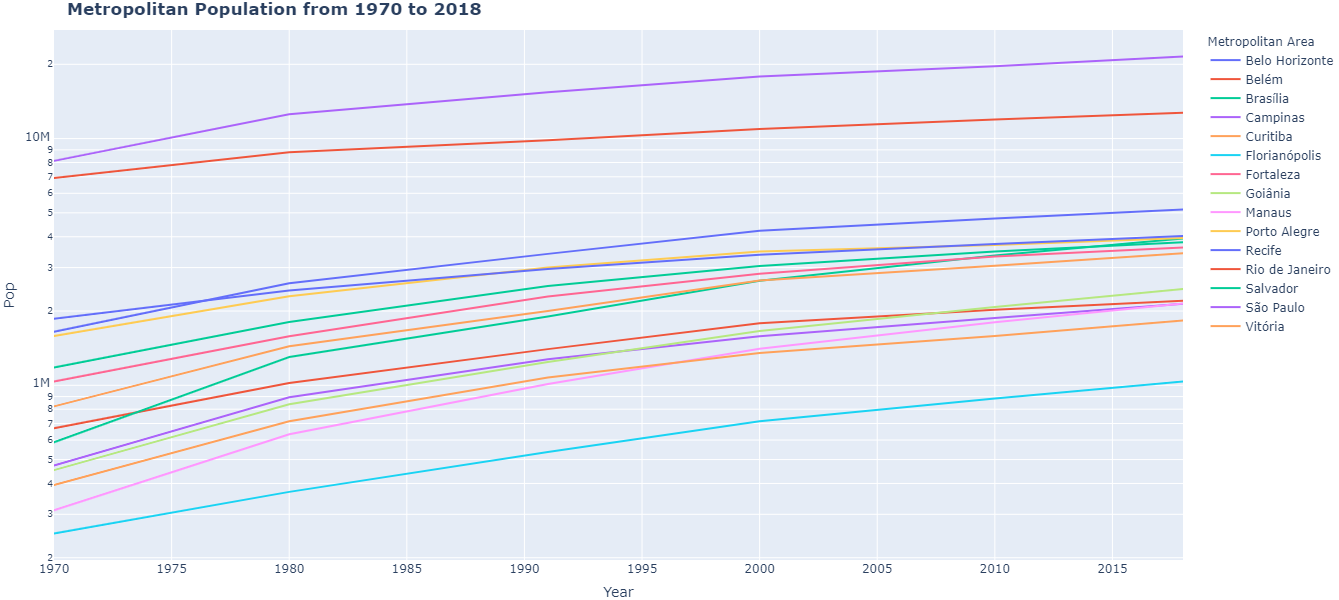

In [199]:
fig_pop_line = px.line(
    data_frame=df_pop.drop('Cod', axis=1).groupby(['Metropolitan Area', 'Year'], as_index=False).sum()
    , x='Year'
    , y='Pop'
    , color='Metropolitan Area'
    , log_y=True
    , title = '<b>Metropolitan Population from 1970 to 2018<b>'
    , height=600 
    , width = 1380
)
fig_pop_line.update_layout(margin=dict(l=0, r=0, b=0, t=30))

In [200]:
dict_groups = {
    'Belo Horizonte':'Group B'
    ,'Belém':'Group C'
    ,'Brasília': 'Group B'
    ,'Campinas': 'Group C'
    ,'Curitiba': 'Group B'
    ,'Florianópolis': 'Group D'
    ,'Fortaleza':'Group B'
    ,'Goiânia':'Group C'
    ,'Manaus': 'Group C'
    ,'Porto Alegre': 'Group B'
    ,'Recife':'Group B'
    ,'Rio de Janeiro':'Group A'
    ,'Salvador':'Group B'
    ,'São Paulo': 'Group A'
    ,'Vitória':'Group C'
}

In [201]:
for i, scatter in enumerate(fig_pop_line.data):
    key = scatter.legendgroup
    fig_pop_line.data[i].legendgroup = dict_groups[key]

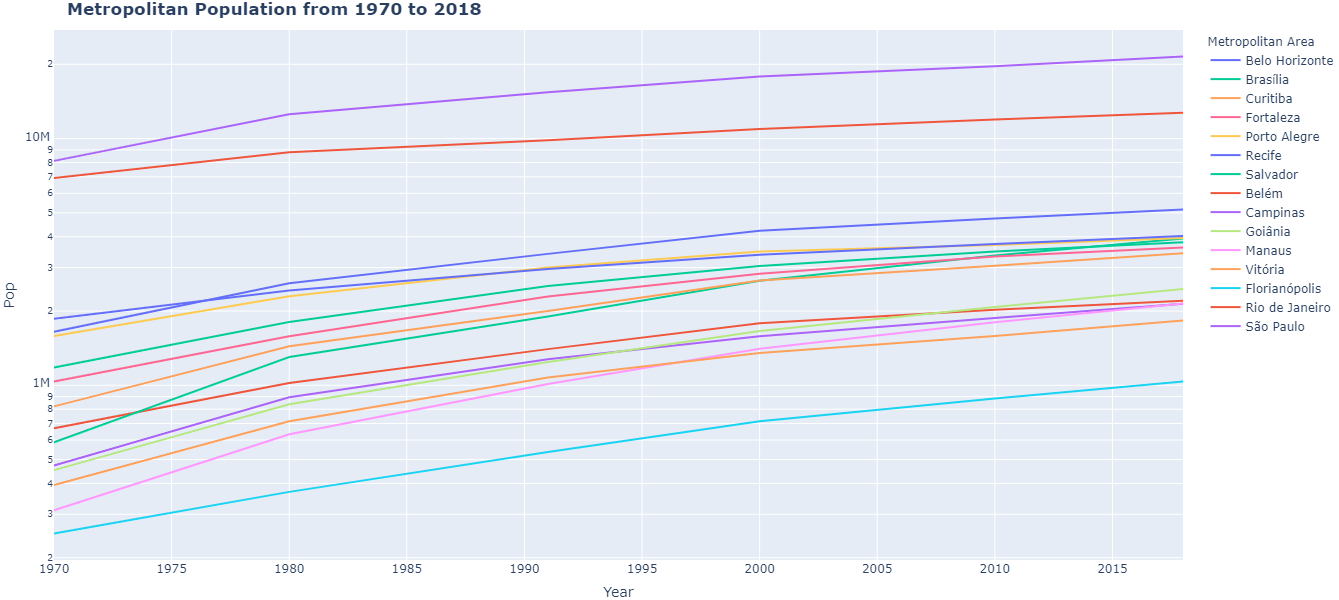

In [202]:
fig_pop_line

In [203]:
dict_dash = {
    'Belo Horizonte':'dash'
    ,'Belém':'longdashdot'
    ,'Brasília': 'dash'
    ,'Campinas': 'longdashdot'
    ,'Curitiba':'dash'
    ,'Florianópolis': 'solid'
    ,'Fortaleza':'dash'
    ,'Goiânia':'longdashdot'
    ,'Manaus': 'longdashdot'
    ,'Porto Alegre':'dash'
    ,'Recife':'dash'
    ,'Rio de Janeiro':'dot'
    ,'Salvador':'dash'
    ,'São Paulo': 'dot'
    ,'Vitória':'longdashdot'
}

In [204]:
for i, key in enumerate(dict_dash.keys()):
    fig_pop_line.data[i].line.dash = dict_dash[key]

In [205]:
fig_pop_line.layout.legend.tracegroupgap = 15

In [206]:
fig_pop_line.layout.legend.traceorder = "grouped"

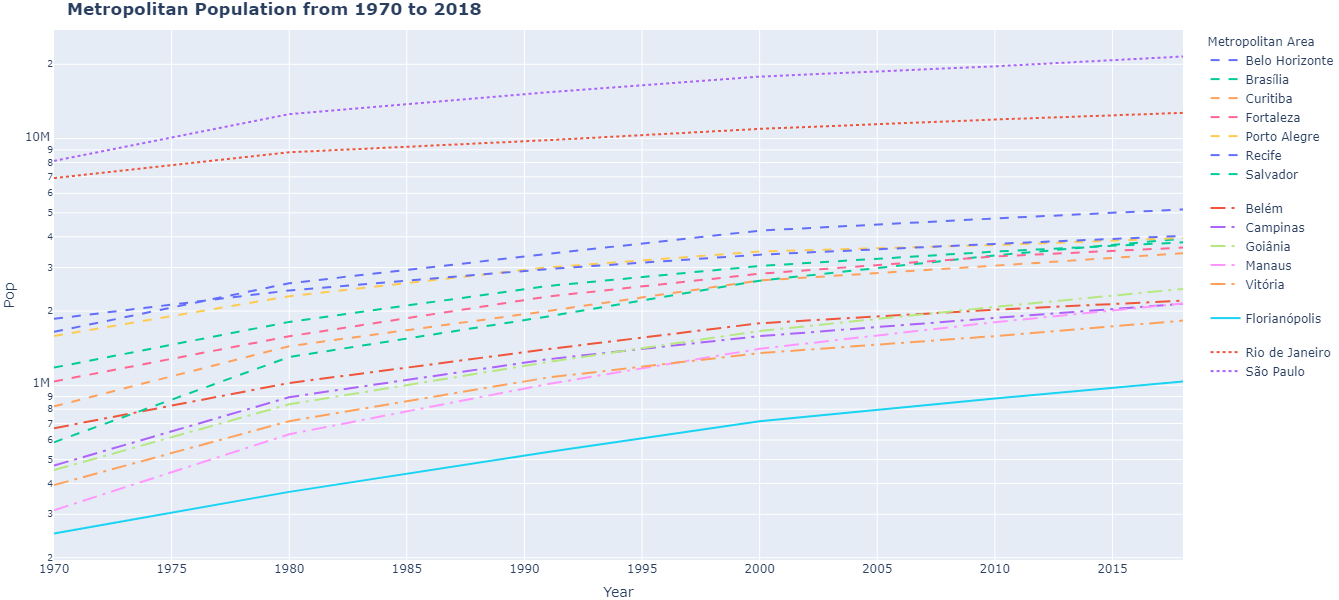

In [207]:
fig_pop_line

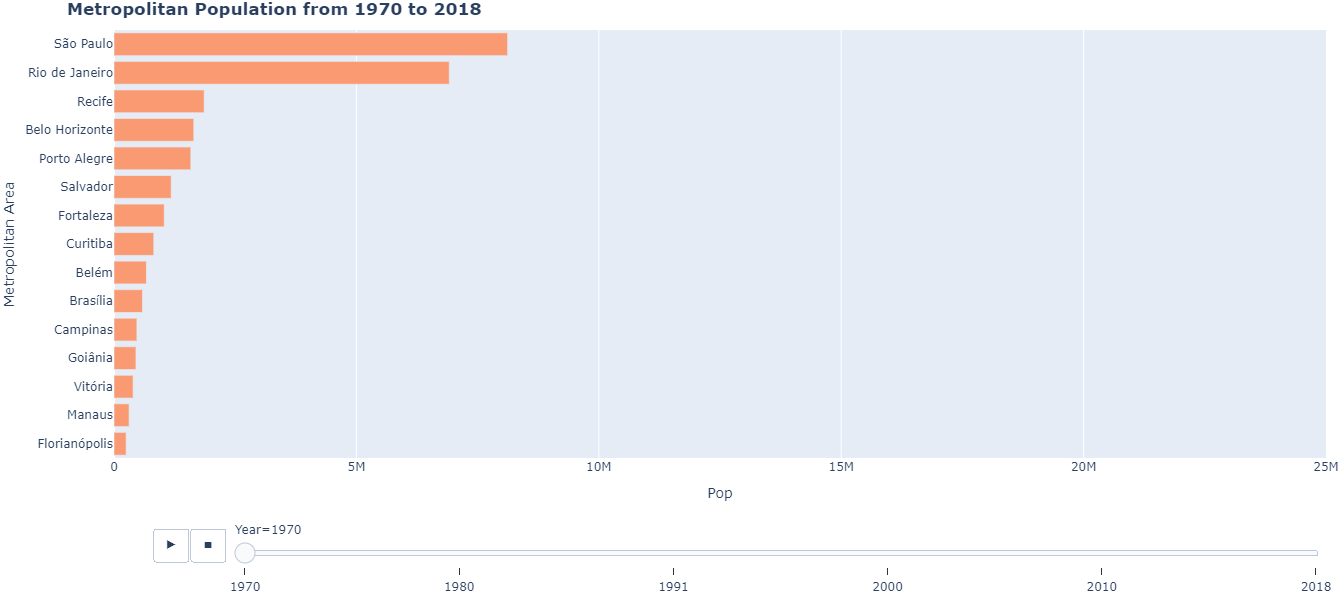

In [208]:
fig_pop = px.bar(
    data_frame=df_pop.drop('Cod', axis=1).groupby(['Metropolitan Area', 'Year'], as_index=False).sum().sort_values(by=['Year', 'Metropolitan Area'])
    , y='Metropolitan Area'
    , x='Pop'
    , animation_frame='Year'
    , orientation='h'
    , range_x = [0,2.5e7]
    , title = '<b>Metropolitan Population from 1970 to 2018<b>'
    , height=600 
    , width = 1380
    , color_discrete_sequence=['#FA9A73']
#    , hover_name='Metropolitan Area'
    , hover_data=['Year', 'Pop']
)
fig_pop.update_layout(yaxis={'categoryorder':"sum ascending"})
fig_pop.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000 
fig_pop.update_layout(margin=dict(l=0, r=0, b=0, t=30))

In [112]:
pio.write_json(fig_pop, '../data/pop/px_bar_pop_70_18_dynamic.json')

## Retrieving GDP per capita

In [212]:
df_pop = df_pop.drop('Cod', axis=1).groupby(['Metropolitan Area', 'Year'], as_index=False).sum().sort_values(by=['Year', 'Metropolitan Area'])

In [213]:
df_pop['Year'] = df_pop.Year.astype(np.int32)

In [214]:
df_pop.merge(df_gdp_70_18, how='left', on=['Metropolitan Area', 'Year'])

,Metropolitan Area,Year,Pop,GDP R$1000
0,Belo Horizonte,1970,1646553,"18,602,938.05"
1,Belém,1970,669768,"4,460,086.76"
2,Brasília,1970,587652,"9,003,962.68"
3,Campinas,1970,472829,"9,120,531.65"
4,Curitiba,1970,821233,"9,970,486.81"
...,...,...,...,...
85,Recife,2018,4031485,"107,509,937.00"
86,Rio de Janeiro,2018,12712762,"565,696,625.00"
87,Salvador,2018,3795668,"117,996,716.00"
88,São Paulo,2018,21510595,"1,179,573,402.00"


In [215]:
df_pop_estimated = pd.read_csv('../data/pop/pop_1970_2018.csv', sep=';')

In [216]:
df_pop_estimated = df_territory.merge(df_pop_estimated, on='Cod', how='left')

In [217]:
df_pop_estimated.drop(labels=['Cod', 'Município'], axis=1, inplace=True)

In [218]:
df_temp = df_pop_estimated.groupby(by=['Metropolitan Area'], as_index=False).sum().melt(id_vars=['Metropolitan Area'], var_name='Year', value_name='Pop')

In [219]:
df_temp['Year'] = df_temp.Year.astype(np.int32)

In [220]:
df_gdp_70_18 = df_gdp_70_18.merge(right=df_temp, how='inner', left_on=['Metropolitan Area', 'Year'], right_on=['Metropolitan Area', 'Year'])

In [221]:
df_gdp_70_18['GDP per capita'] = (df_gdp_70_18['GDP R$1000'] / df_gdp_70_18.Pop * 1000).astype(np.int32)

In [222]:
df_gdp_70_18.Year.unique()

array([1970, 1980, 1996, 2002, 2003, 2004, 2005, 2006, 2008, 2009, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [159]:
df_gdp_70_18[df_gdp_70_18.Year > 1996]

,Metropolitan Area,Year,GDP R$1000,Pop,GDP per capita
45,Belo Horizonte,2002,"137,470,936.00",4406819,"31,195.05"
46,Belém,2002,"31,674,817.00",1866561,"16,969.61"
47,Brasília,2002,"180,989,175.00",2813306,"64,333.27"
48,Campinas,2002,"99,720,336.00",1646574,"60,562.32"
49,Curitiba,2002,"112,477,090.00",2797437,"40,207.19"
...,...,...,...,...,...
265,Recife,2018,"107,509,937.00",4031485,"26,667.58"
266,Rio de Janeiro,2018,"565,696,625.00",12712762,"44,498.33"
267,Salvador,2018,"117,996,716.00",3795668,"31,087.21"
268,São Paulo,2018,"1,179,573,402.00",21510595,"54,836.86"


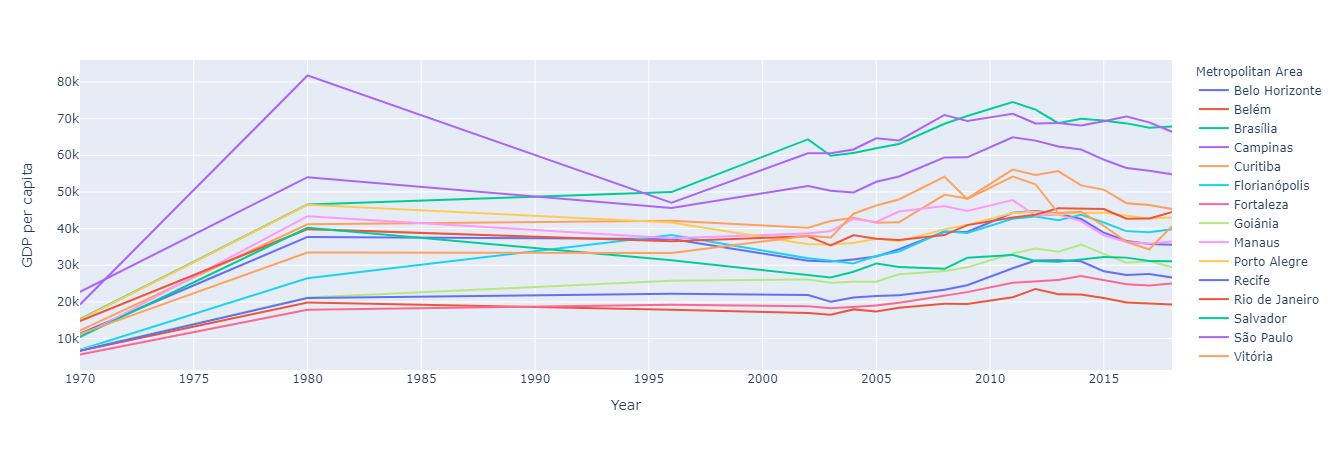

In [230]:
px.line(
    data_frame=df_gdp_70_18
    , x='Year'
    , y='GDP per capita'
    , color='Metropolitan Area'
#    , log_y=True
)


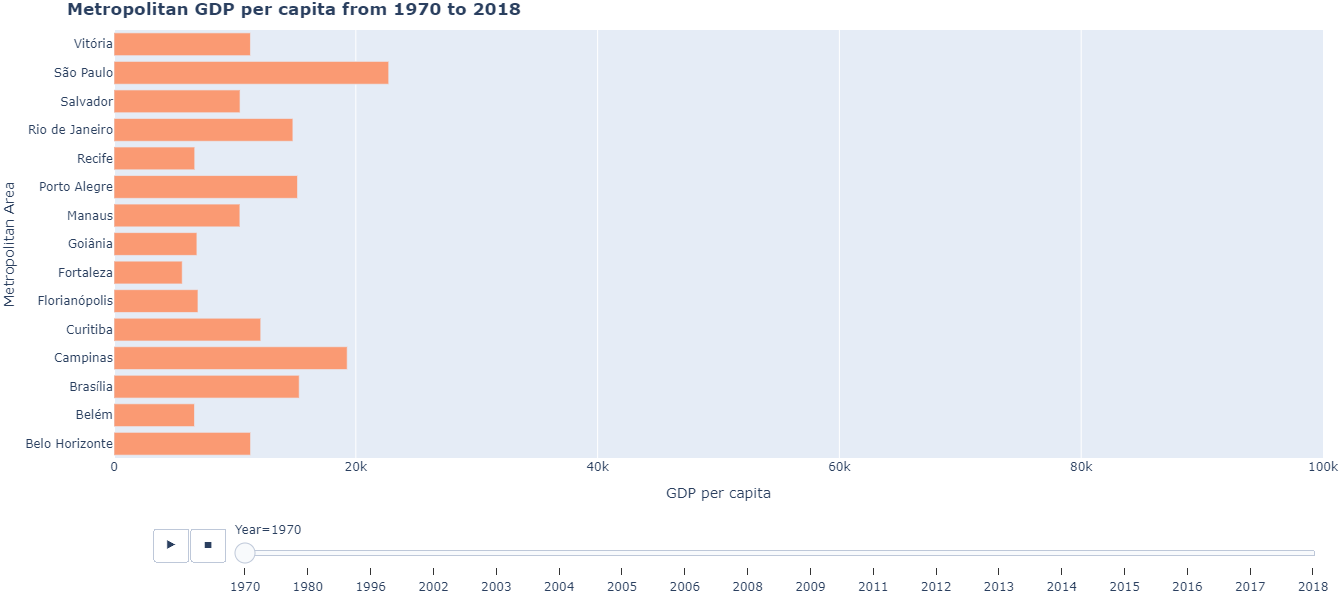

In [228]:
fig_gdp_percapita = px.bar(
#    data_frame=df_gdp_70_18[df_gdp_70_18.Year > 1996]
    data_frame=df_gdp_70_18    
    , y='Metropolitan Area'
    , x='GDP per capita'
    , animation_frame='Year'
    , orientation='h'
    , range_x = [0, 10.0e4]
    , title = '<b>Metropolitan GDP per capita from 1970 to 2018<b>'
    , height=600 
    , width = 1380
    , color_discrete_sequence=['#FA9A73']
#    , hover_name='Metropolitan Area'
#    , hover_data=['Year', 'Pop']
)
fig_gdp_percapita.update_layout(yaxis={'categoryorder':"sum ascending"})
fig_gdp_percapita.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000 
fig_gdp_percapita.update_layout(margin=dict(l=0, r=0, b=0, t=30))

In [227]:
pio.write_json(fig_gdp_percapita, '../data/economy/gdp/px_bar_gdppercapita_02_18_dynamic.json')

In [146]:
df_gdp_70_18.Year.unique()

array([1970, 1980, 1996, 2002, 2003, 2004, 2005, 2006, 2008, 2009, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [ ]:
df_territory = pd.read_csv('../data/territory/list_arranjos_pop.csv', sep=';')

In [ ]:
df_territory.merge(right=df_income_2000, on='cod', )

In [ ]:
df_income_91 = pd.read_csv(
    '../data/economics/income/income all sources 1991 census bme.csv'
    , sep=';'
    , encoding='ANSI'
    , decimal=','
    , thousands='.'
)

In [ ]:
df_income_91.columns

In [ ]:
df_income_91.drop(
    labels= [
        'Código do Nível Geográfico'
        , 'Nível Geográfico'
        , 'Item Geográfico'
        , 'Código do Item Temporal'
        , 'Nível Temporal'
        , 'Ordem Geográfica'
        , 'Freqüência'
        , 'Observações']
    , axis=1
    , inplace=True
)

In [ ]:
df_income_91.columns

In [ ]:
df_income_91.info()


## Retomando dados corretos de Renda e Renda Per Capita

In [286]:
df_income_70_00 = pd.read_csv('../data/economy/income/total_income_ipea_1970_2000.csv', sep=';')

In [287]:
df_income_70_00.iloc[:,2:] = df_income_70_00.iloc[:,2:].fillna(0)

In [288]:
# correcting data, considering it was 1,25% less then IBGE's in 2000 (multiplying for 1000, considering they simplified the currency)
df_income_70_00.iloc[:,2:] = df_income_70_00.iloc[:,2:] * 1.01248 * 1000

In [289]:
# deflating values from july/2000 to december/2018 (IPCA)
df_income_70_00.iloc[:,2:] = (df_income_70_00.iloc[:,2:] * 3.15907400).astype(np.int64)

In [299]:
def load_income_91_00(year=1991):
    df = pd.read_csv(
        f'../data/economy/income/income all sources {year} census bme.csv'
        , sep=';'
        , encoding='ANSI'
        , decimal=','
        , thousands='.'
    )

    df.drop(
        labels= [
            'Código do Nível Geográfico'
            , 'Nível Geográfico'
            , 'Item Geográfico'
            , 'Código do Item Temporal'
            , 'Nível Temporal'
            , 'Ordem Geográfica'
            , 'Freqüência'
            , 'Observações']
        , axis=1
        , inplace=True
    )
    
    df.columns = ['Cod', 'Year', 'GrossIncome']
    
    return df

In [300]:
df_income_2010 = load_income_91_00(year=2010)

In [301]:
# correção dos valores de julho de 2000 e julho de 2010 para 31 de dezembro de 2018
df_income_2010['GrossIncome'] = (df_income_2010.GrossIncome * 1.63968750).astype(np.int64)

In [304]:
df_income_70_10 = df_income_70_00.merge(
    right=df_income_2010.rename(columns={'GrossIncome': '2010'}).drop(labels='Year', axis=1)
    ,on='Cod'
    ,how='left' 
)

In [309]:
df_income_70_10['2010'] = df_income_70_10['2010'].fillna(0).astype(np.int64)

In [314]:
df_income_70_10 = df_territory.merge(
    right=df_income_70_10
    , on='Cod'
    , how='left'
)

In [317]:
df_income_70_10 = df_income_70_10.drop(labels=['Cod', 'Município'], axis=1).melt(id_vars=['Metropolitan Area'], var_name='Year', value_name='Income')

In [320]:
df_income_70_10 = df_income_70_10.groupby(
    by=['Metropolitan Area', 'Year']
    , as_index=False
).sum()

In [331]:
df_income_70_10['Year'] = df_income_70_10['Year'].astype(np.int32)

In [327]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Metropolitan Area  90 non-null     object
 1   Year               90 non-null     int32 
 2   Pop                90 non-null     int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 2.5+ KB


In [333]:
df_income_70_10_percapita = df_income_70_10.merge(
    right=df_pop
    , left_on=['Metropolitan Area', 'Year']
    , right_on=['Metropolitan Area', 'Year']
    , how='left'
)

In [338]:
df_income_70_10_percapita['Montly Per Capita Income'] = (df_income_70_10_percapita['Income'] / df_income_70_10_percapita['Pop']).astype(np.int64)

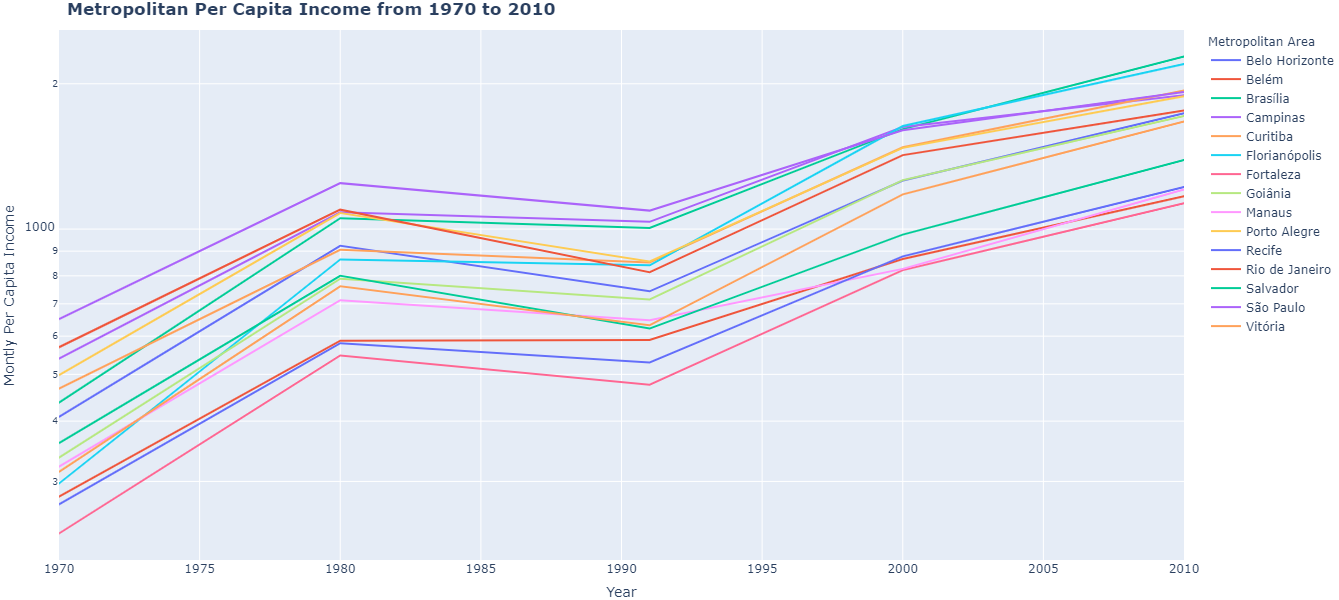

In [339]:
fig_percap_income = px.line(
    data_frame=df_income_70_10_percapita
    , x='Year'
    , y='Montly Per Capita Income'
    , color='Metropolitan Area'
    , log_y=True
    , title = '<b>Metropolitan Per Capita Income from 1970 to 2010<b>'
    , height=600 
    , width = 1380
)
fig_percap_income.update_layout(margin=dict(l=0, r=0, b=0, t=30))

In [340]:
pio.write_json(fig_percap_income, '../data/economy/income/fig_line_percapita_income.json')

In [200]:
dict_groups = {
    'Belo Horizonte':'Group B'
    ,'Belém':'Group C'
    ,'Brasília': 'Group B'
    ,'Campinas': 'Group C'
    ,'Curitiba': 'Group B'
    ,'Florianópolis': 'Group D'
    ,'Fortaleza':'Group B'
    ,'Goiânia':'Group C'
    ,'Manaus': 'Group C'
    ,'Porto Alegre': 'Group B'
    ,'Recife':'Group B'
    ,'Rio de Janeiro':'Group A'
    ,'Salvador':'Group B'
    ,'São Paulo': 'Group A'
    ,'Vitória':'Group C'
}

In [201]:
for i, scatter in enumerate(fig_pop_line.data):
    key = scatter.legendgroup
    fig_pop_line.data[i].legendgroup = dict_groups[key]

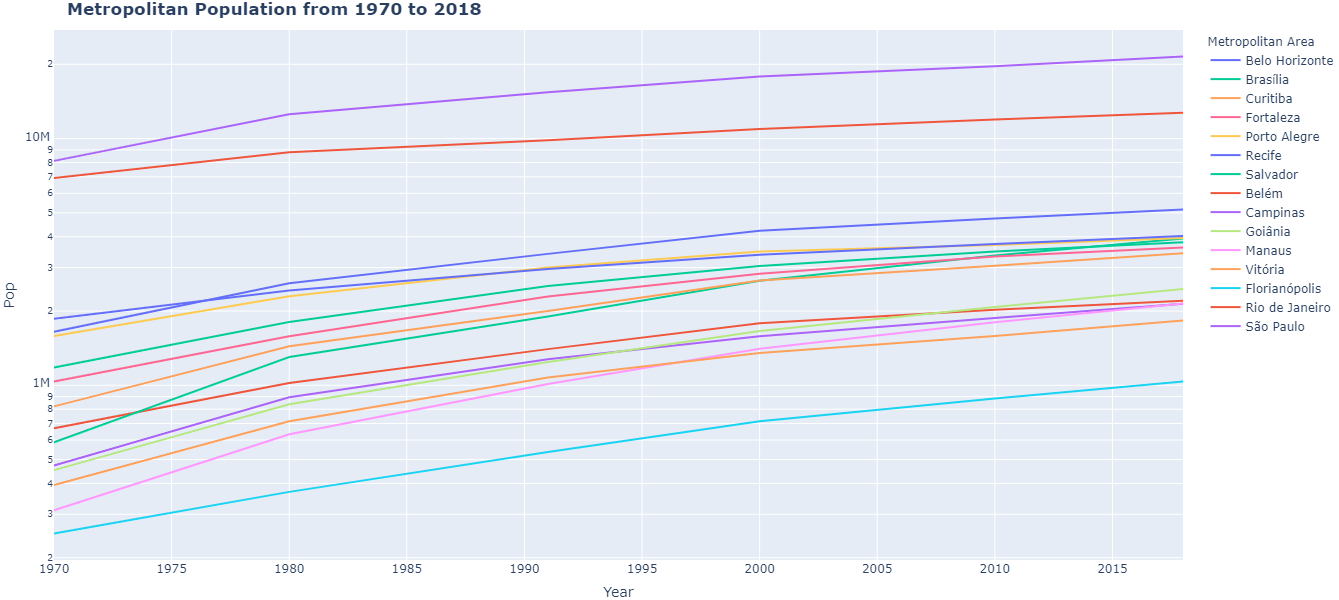

In [202]:
fig_pop_line

In [203]:
dict_dash = {
    'Belo Horizonte':'dash'
    ,'Belém':'longdashdot'
    ,'Brasília': 'dash'
    ,'Campinas': 'longdashdot'
    ,'Curitiba':'dash'
    ,'Florianópolis': 'solid'
    ,'Fortaleza':'dash'
    ,'Goiânia':'longdashdot'
    ,'Manaus': 'longdashdot'
    ,'Porto Alegre':'dash'
    ,'Recife':'dash'
    ,'Rio de Janeiro':'dot'
    ,'Salvador':'dash'
    ,'São Paulo': 'dot'
    ,'Vitória':'longdashdot'
}

In [204]:
for i, key in enumerate(dict_dash.keys()):
    fig_pop_line.data[i].line.dash = dict_dash[key]

In [205]:
fig_pop_line.layout.legend.tracegroupgap = 15

In [206]:
fig_pop_line.layout.legend.traceorder = "grouped"

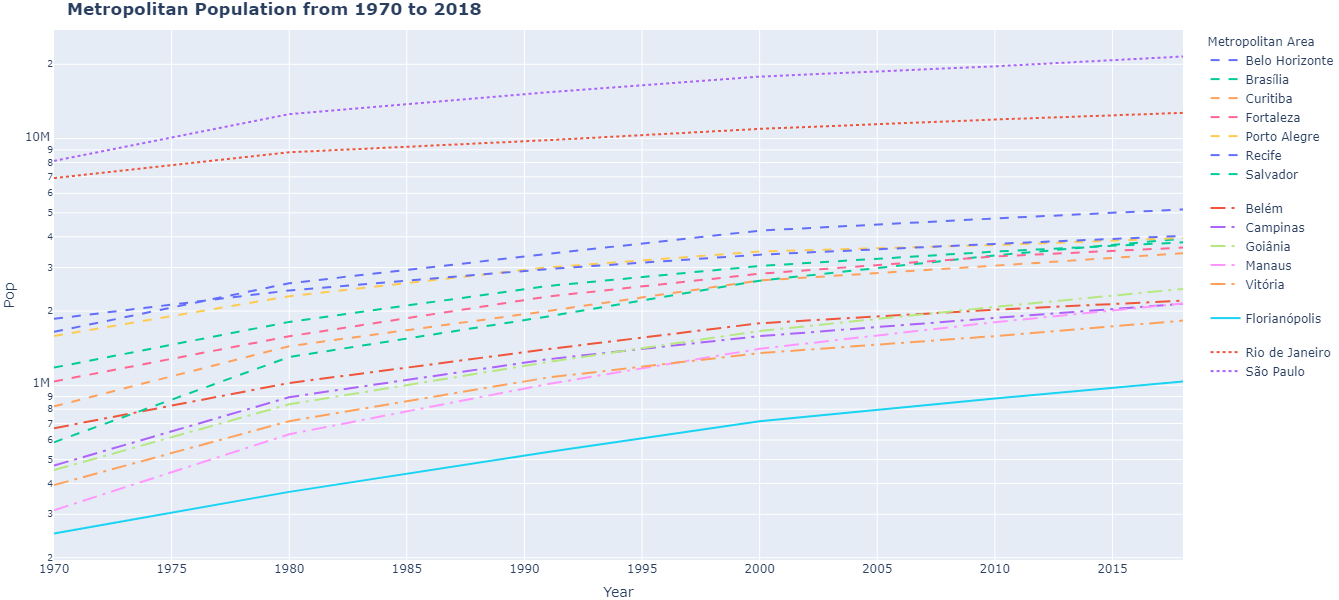

In [207]:
fig_pop_line

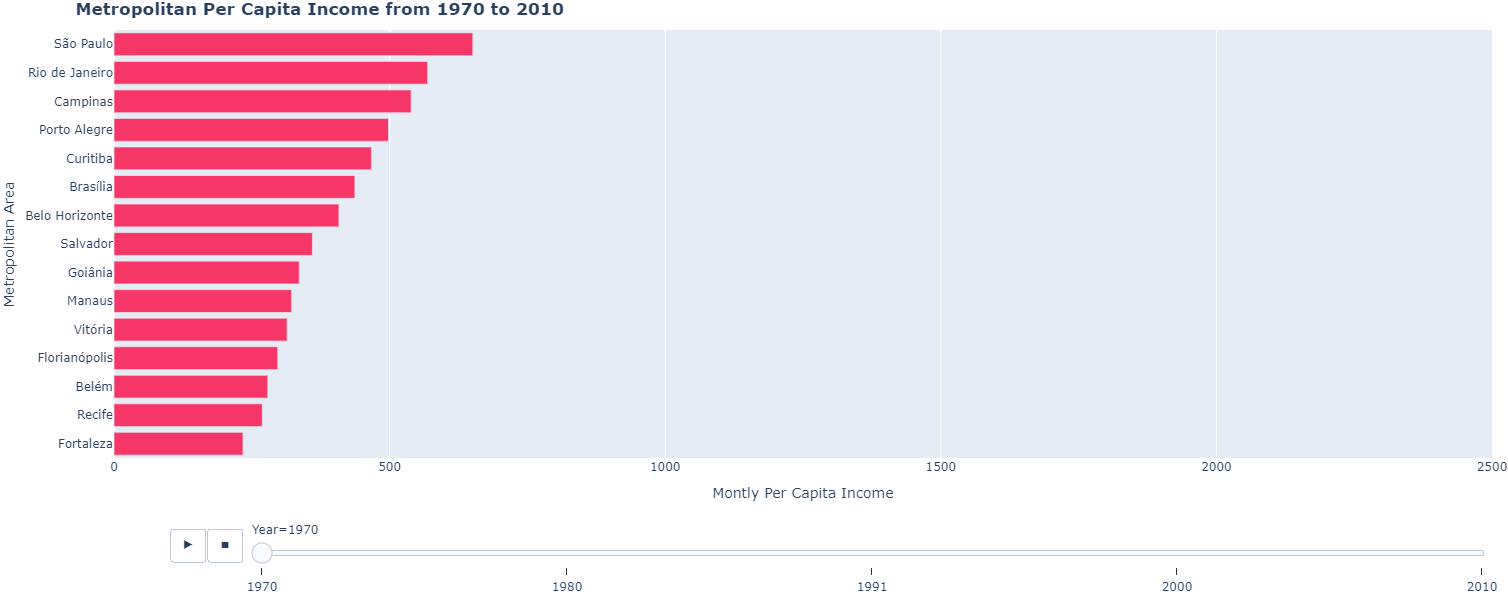

In [343]:
fig_bar_income = px.bar(
    data_frame=df_income_70_10_percapita
    , y='Metropolitan Area'
    , x='Montly Per Capita Income'
    , animation_frame='Year'
    , orientation='h'
    , range_x = [0,2.5e3]
    , title = '<b>Metropolitan Per Capita Income from 1970 to 2010<b>'
    , height=600 
    , width = 1380
    , color_discrete_sequence=['#F63666']
#    , hover_name='Metropolitan Area'
    , hover_data=['Year', 'Pop']
)
fig_bar_income.update_layout(yaxis={'categoryorder':"sum ascending"})
fig_bar_income.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000 
fig_bar_income.update_layout(margin=dict(l=0, r=0, b=0, t=30))

In [344]:
pio.write_json(fig_bar_income, '../data/economy/income/fig_dynamic_bar_percapita_income.json')